#### Problem Statement
The aim is to predict the genuiness of image of Pavbhaji.

I will be using the Fastai library. It is a deep learning library which provides practitioners with high-level components that can quickly and easily provide state-of-the-art results in standard deep learning domains, and provides researchers with low-level components that can be mixed and matched to build new approaches. It aims to do both things without substantial compromises in ease of use, flexibility, or performance.

#### Import Important Libraries

In [27]:
from fastai.vision import *

In [28]:
path = '/home/shivangmathur/Downloads/dataset/'

#### View data

In [29]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [30]:
data.classes

['0', '1']

Let's take a look at some of our pictures.

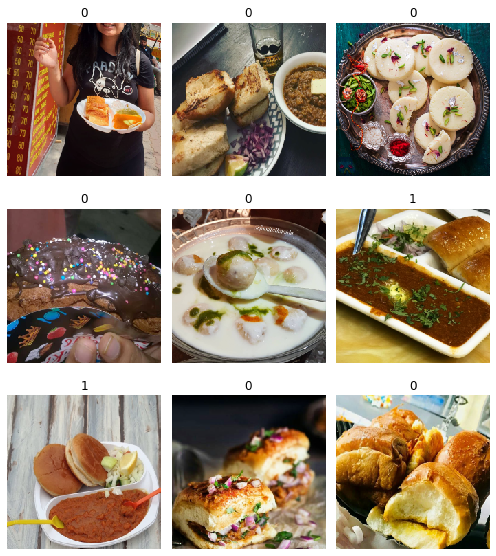

In [31]:
data.show_batch(rows=3, figsize=(7,8))

In [32]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['0', '1'], 2, 362, 90)

#### Train model

I am going to use a pre-trained model, that is, a model created by some one else to solve a different problem. Instead of building a model from scratch to solve a similar problem, I'll use a model trained on ImageNet (1.2 million images and 1000 classes) as a starting point. The model is a Convolutional Neural Network (CNN), a type of Neural Network that builds state-of-the-art models for computer vision. We'll be learning all about CNNs during this course.

I will be using the resnet34 model. Resnet34 is a version of the model that won the 2015 ImageNet competition. 

In [33]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [34]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.133576,2.231019,0.444444,00:26
1,0.934496,0.940643,0.277778,00:26
2,0.784388,0.605535,0.233333,00:26
3,0.690380,0.532215,0.188889,00:25


In [35]:
learn.save('stage-1')

In [36]:
learn.unfreeze()

#### Choosing a learning rate


The method learn.lr_find() helps to find an optimal learning rate. It uses the technique developed in the 2015 paper Cyclical Learning Rates for Training Neural Networks, where we simply keep increasing the learning rate from a very small value, until the loss stops decreasing. We can plot the learning rate across batches to see what this looks like.

We first create a new learner, since we want to know how to set the learning rate for a new (untrained) model.


In [37]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Learn object contains an attribute sched that contains our learning rate scheduler, and has some convenient plotting functionality including this one:

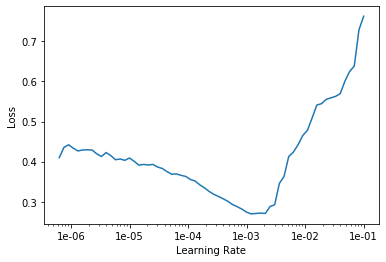

In [38]:
learn.recorder.plot()

In [47]:
learn.fit_one_cycle(3, max_lr=slice(1e-055 ,1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.171259,0.511226,0.155556,00:32
1,0.156083,0.552048,0.155556,00:32
2,0.144412,0.565851,0.155556,00:32


In [48]:
learn.save('stage-2')

In [49]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (362 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,0,0
Path: /home/shivangmathur/Downloads/dataset;

Valid: LabelList (90 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
1,0,1,1,0
Path: /home/shivangmathur/Downloads/dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True,

#### Interpretation

In [50]:
interp = ClassificationInterpretation.from_learner(learn)

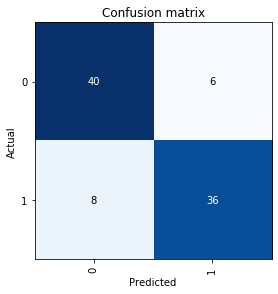

In [51]:
interp.plot_confusion_matrix()

#### We have attained accuracy of 84.4% on our validation set.